## Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.
## Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on

### predicting the possibility of diabetes with the help of paramaters such as : 

Pregnancies	
Glucose	
BloodPressure	
SkinThickness	
Insulin	
BMI	
DiabetesPedigreeFunction	
Age

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')
df.head()

In [ ]:
df.describe().T

here it does not make sense for Glucose;BloodPressure;SkinThickness;Insulin;BMI	to have value as zero

-->replacing zero with nan.

In [ ]:
df1 = df.copy(deep=True)
df1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [ ]:
import seaborn as sns
sns.heatmap(df1.isnull())
print(df1.isnull().sum())

To fill these Nan values the data distribution needs to be understood

In [ ]:
p = df1.hist(figsize = (20,20),rwidth=0.9)

imputing nan values for the columns in accordance with their distribution


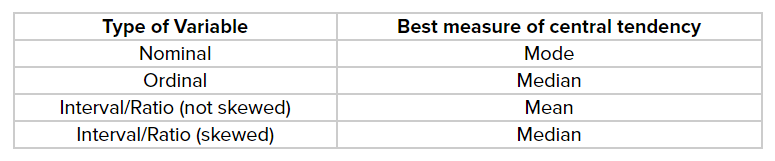

In [ ]:
df1['Glucose'].fillna(df1['Glucose'].mean(), inplace = True)
df1['BloodPressure'].fillna(df1['BloodPressure'].mean(), inplace = True)
df1['SkinThickness'].fillna(df1['SkinThickness'].median(), inplace = True)
df1['Insulin'].fillna(df1['Insulin'].median(), inplace = True)
df1['BMI'].fillna(df1['BMI'].mean(), inplace = True)

In [ ]:
p = df1.hist(figsize = (20,20), rwidth=0.9)

In [ ]:
sns.heatmap(df1.isnull())
print(df1.isnull().sum())

creating logistic regression model

In [ ]:
x = df1[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI','DiabetesPedigreeFunction', 'Age']].values
y = df1[['Outcome']].values

Train Test Split
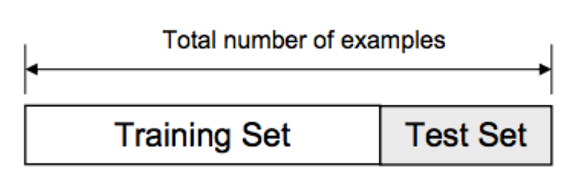

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=101)

Training and predicting

In [ ]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(X_train,y_train)

In [ ]:
predictions = lm.predict(X_test)

Evaluation

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))